In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"fajartu","key":"4fcec3dc383e182fd603f46e24942c80"}'}

In [ ]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              234KB  2021-07-24 09:20:05           9740  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           5993  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           2216  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-07-03 18:37:20           2480  
fatiimaezzahra/famous-iconic-women                          Famous Iconic Wo

In [ ]:
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

 99% 606M/612M [00:04<00:00, 156MB/s]
100% 612M/612M [00:04<00:00, 148MB/s]


In [ ]:
! mkdir dataset

In [ ]:
! unzip gtsrb-german-traffic-sign.zip -d dataset

Streaming output truncated to the last 5000 lines.
  inflating: dataset/train/5/00005_00053_00010.png  
  inflating: dataset/train/5/00005_00053_00011.png  
  inflating: dataset/train/5/00005_00053_00012.png  
  inflating: dataset/train/5/00005_00053_00013.png  
  inflating: dataset/train/5/00005_00053_00014.png  
  inflating: dataset/train/5/00005_00053_00015.png  
  inflating: dataset/train/5/00005_00053_00016.png  
  inflating: dataset/train/5/00005_00053_00017.png  
  inflating: dataset/train/5/00005_00053_00018.png  
  inflating: dataset/train/5/00005_00053_00019.png  
  inflating: dataset/train/5/00005_00053_00020.png  
  inflating: dataset/train/5/00005_00053_00021.png  
  inflating: dataset/train/5/00005_00053_00022.png  
  inflating: dataset/train/5/00005_00053_00023.png  
  inflating: dataset/train/5/00005_00053_00024.png  
  inflating: dataset/train/5/00005_00053_00025.png  
  inflating: dataset/train/5/00005_00053_00026.png  
  inflating: dataset/train/5/00005_00053_00027.p

In [ ]:
!pip install Pillow

In [ ]:
# import module 
import os
from PIL import Image
import cv2
import numpy as np

import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout,BatchNormalization
from tensorflow.python.keras import regularizers

In [ ]:
# import dataset
dir = '/content/dataset/Train'
data_dir = os.listdir(dir)

In [ ]:
# hitung jumlah files dalam images
files_count = len(data_dir)
print(files_count)

43


In [ ]:
# load image dan bikin label
img_list = []
labels_list = []
for index, category in enumerate(data_dir):
  for image in os.listdir(dir+"/"+category):
    img = cv2.imread(dir+"/"+category+"/"+image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = Image.fromarray(img, 'RGB')
    img_list.append(np.array(img))
#     label = category.split('-')
#     labels_list.append(label[1])
# cek ukuran data gambar sebanyak 5
for size in img_list[:20]:
  print(size.shape)

(88, 97, 3)
(83, 94, 3)
(46, 50, 3)
(36, 36, 3)
(72, 87, 3)
(45, 48, 3)
(35, 37, 3)
(36, 37, 3)
(44, 46, 3)
(75, 87, 3)
(54, 58, 3)
(116, 117, 3)
(57, 60, 3)
(54, 61, 3)
(30, 31, 3)
(43, 47, 3)
(106, 117, 3)
(39, 44, 3)
(38, 39, 3)
(44, 48, 3)


In [ ]:
print("total gambar :" + str(len(img_list)))

total gambar :39209


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

dataset_datagen = ImageDataGenerator(
                    rescale=1./225,
                    zoom_range=0.2,
                    # rotation_range=20,
                    horizontal_flip=True,
                    shear_range=0.2,
                    # fill_mode='wrap',
                    validation_split=0.2) # split data validasi 20%

In [ ]:
batch_size = 64
img_height = 28
img_width = 28

In [ ]:
# mengunakan image data generator
train_generator = dataset_datagen.flow_from_directory(
        dir, # direktori data latih
        target_size=(img_height,img_width), # mengubah resolusi seluruh gambar 
        batch_size=batch_size,
        shuffle=True,
        subset='training',
        class_mode='categorical' 
) 
validation_generator = dataset_datagen.flow_from_directory(
        dir, # direktori data validasi
        target_size=(img_height,img_width), # mengubah resolusi seluruh gambar 
        batch_size=batch_size, 
        class_mode='categorical', 
        subset='validation'
) 

Found 31368 images belonging to 43 classes.
Found 7841 images belonging to 43 classes.


In [ ]:
# cek class names
class_names = train_generator.class_indices
print(class_names)

{'0': 0, '1': 1, '10': 2, '11': 3, '12': 4, '13': 5, '14': 6, '15': 7, '16': 8, '17': 9, '18': 10, '19': 11, '2': 12, '20': 13, '21': 14, '22': 15, '23': 16, '24': 17, '25': 18, '26': 19, '27': 20, '28': 21, '29': 22, '3': 23, '30': 24, '31': 25, '32': 26, '33': 27, '34': 28, '35': 29, '36': 30, '37': 31, '38': 32, '39': 33, '4': 34, '40': 35, '41': 36, '42': 37, '5': 38, '6': 39, '7': 40, '8': 41, '9': 42}


In [ ]:
for image_batch, labels_batch in train_generator:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(64, 28, 28, 3)
(64, 43)


In [ ]:
# defining model structure
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5), activation ='relu', input_shape = (28,28,3)))
model.add(Conv2D(filters = 32, kernel_size = (5,5), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(rate = 0.2))

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation ='relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(rate = 0.2))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(rate = 0.5))
model.add(Dense(43, activation= 'softmax'))


model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 24, 24, 32)        2432      
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 20, 20, 32)        25632     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 10, 10, 32)        0         
_________________________________________________________________
dropout_31 (Dropout)         (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 8, 8, 64)          18496     
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 6, 6, 64)          36928     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 3, 3, 64)        

In [ ]:
# compile model dengan 'RMSprop' optimizer loss function 'categorical_crossentropy' 
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(lr=0.001),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.0001)

In [ ]:
epochs=100
history = model.fit(
  train_generator,
  validation_data=validation_generator,
  epochs=epochs,
  validation_steps=15,
  steps_per_epoch=100,
  callbacks=[ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001), 
                               EarlyStopping(monitor='val_loss', mode='auto', patience=20, verbose=1),
                               EarlyStopping(monitor='val_accuracy', mode='auto', patience=10, verbose=1)]
)

Epoch 1/100
100/100 [==============================] - 6s 55ms/step - loss: 3.4526 - accuracy: 0.0891 - val_loss: 3.1635 - val_accuracy: 0.1229
Epoch 2/100
100/100 [==============================] - 6s 55ms/step - loss: 2.5825 - accuracy: 0.2708 - val_loss: 2.1551 - val_accuracy: 0.4000
Epoch 3/100
100/100 [==============================] - 6s 56ms/step - loss: 1.8723 - accuracy: 0.4280 - val_loss: 1.5662 - val_accuracy: 0.5219
Epoch 4/100
100/100 [==============================] - 5s 51ms/step - loss: 1.4818 - accuracy: 0.5203 - val_loss: 1.2174 - val_accuracy: 0.5885
Epoch 5/100
100/100 [==============================] - 5s 51ms/step - loss: 1.1742 - accuracy: 0.6094 - val_loss: 0.9738 - val_accuracy: 0.7031
Epoch 6/100
100/100 [==============================] - 5s 51ms/step - loss: 0.9928 - accuracy: 0.6666 - val_loss: 0.8601 - val_accuracy: 0.7479
Epoch 7/100
100/100 [==============================] - 5s 51ms/step - loss: 0.8518 - accuracy: 0.7152 - val_loss: 0.8473 - val_accuracy:

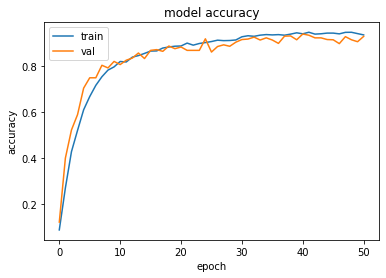

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

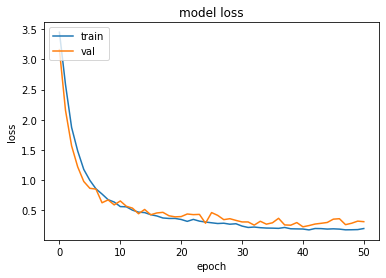

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# Konversi model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmp8qismik1/assets


In [ ]:
with tf.io.gfile.GFile('SubmissionLastBanget_FajarTriUtomo.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
# path tflite
path = "/content/SubmissionLastBanget_FajarTriUtomo.tflite"